In [4]:
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
data = pd.read_csv('anime.csv')
data = data[['title', 'score', 'scored_by', 'episodes', 'start_date', 'end_date',
             'members', 'start_year', 'favorites', 'genres', 'themes', 'synopsis']]
data = data[data['start_year'] >= 1980]
data

,title,score,scored_by,episodes,start_date,end_date,members,start_year,favorites,genres,themes,synopsis
0,Fullmetal Alchemist: Brotherhood,9.13,1871705,64.0,2009-04-05,2010-07-04,2932347,2009.0,204645,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],After a horrific alchemy experiment goes wrong...
1,Hunter x Hunter (2011),9.04,1509622,148.0,2011-10-02,2014-09-24,2418883,2011.0,185178,"['Action', 'Adventure', 'Fantasy']",[],Hunters devote themselves to accomplishing haz...
2,Shingeki no Kyojin Season 3 Part 2,9.07,1329500,10.0,2019-04-29,2019-07-01,1881734,2019.0,51931,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Seeking to restore humanity's diminishing hope...
3,Steins;Gate,9.08,1252286,24.0,2011-04-06,2011-09-14,2269121,2011.0,173088,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",Eccentric scientist Rintarou Okabe has a never...
4,Koe no Katachi,8.95,1398608,1.0,2016-09-17,2016-09-17,2001335,2016.0,77431,['Drama'],['Romantic Subtext'],"As a wild youth, elementary school student Sho..."
...,...,...,...,...,...,...,...,...,...,...,...,...
20749,Jibian Ying Meng,NaN,1,40.0,2015-10-09,NaN,15,2015.0,0,"['Action', 'Sci-Fi']",['Mecha'],NaN
20751,Yi Xue,NaN,2,57.0,2016-01-05,2016-11-02,15,2016.0,0,['Comedy'],[],NaN
20754,AOKI & Taka no Tsume,NaN,5,7.0,2014-10-22,2015-02-26,15,2014.0,0,['Comedy'],[],A collaboration between Taka no Tsume and AOKI...
20756,Madtoy Chatty,NaN,1,NaN,2022-04-20,NaN,14,2022.0,0,['Comedy'],[],NaN


In [6]:
import plotly.express as px

# Visualizing the top-rated anime based on the year it was released using a line chart
filtered_df = data[['title', 'start_year', 'score']].dropna()
filtered_df['start_year'] = filtered_df['start_year'].astype(int)
data_by_year = filtered_df.groupby('start_year')['score'].max()
highest_rated_anime = filtered_df.loc[filtered_df.groupby('start_year')['score'].idxmax(), ['title', 'start_year', 'score']]

fig = px.line(highest_rated_anime, x='start_year', y='score', labels={'start_year': 'Start Year', 'score': 'Score'},
              title='Highest Rating Anime from Different Start Years')
fig.update_layout(xaxis_tickangle=-40, xaxis_tickfont=dict(size=8))
fig.show()



In [20]:
import plotly.subplots as sp
import plotly.graph_objs as go 
# Visualizing the distribution of ratings comparing loyal fanbases to unloyal - measured by finding the ratio between members
# that have scored the anime and overall number of members.
filtered_data = data[['start_year', 'title', 'score', 'members', 'scored_by']].dropna()
filtered_data = filtered_data.assign(scored_mem_ratio = filtered_data.scored_by/filtered_data.members)
filtered_data['score'] = filtered_data['score'].astype(int)
above_50 = filtered_data[filtered_data['scored_mem_ratio'] >= 0.5]
under_50 = filtered_data[filtered_data['scored_mem_ratio'] < 0.5]

# fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
# fig.suptitle('Rating Distributions: Over 50% of the Member-Base Voting vs. Under 50%')

# sns.countplot(ax=axes[0], x='score', data = above_50)
# axes[0].set_title('Over 50%')
# axes[0].set_xlabel('Score')
# axes[0].set_ylabel('Rated Count')

# sns.countplot(ax=axes[1], x='score', data = under_50)
# axes[1].set_title('Under 50%')
# axes[1].set_xlabel('Score')
# axes[1].set_ylabel('Rated Count')

# plt.show()

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Over 50%', 'Under 50%'))

fig.add_trace(go.Histogram(x=above_50['score'], name='Over 50%'), row=1, col=1)
fig.add_trace(go.Histogram(x=under_50['score'], name='Under 50%'), row=1, col=2)

fig.update_layout(title='Rating Distributions: Over 50% vs Under 50% of the Member-Base Voting',
                  xaxis_title='Score', yaxis_title='Rated Count')

fig.show()
# change the color for each bar chart, fix the l

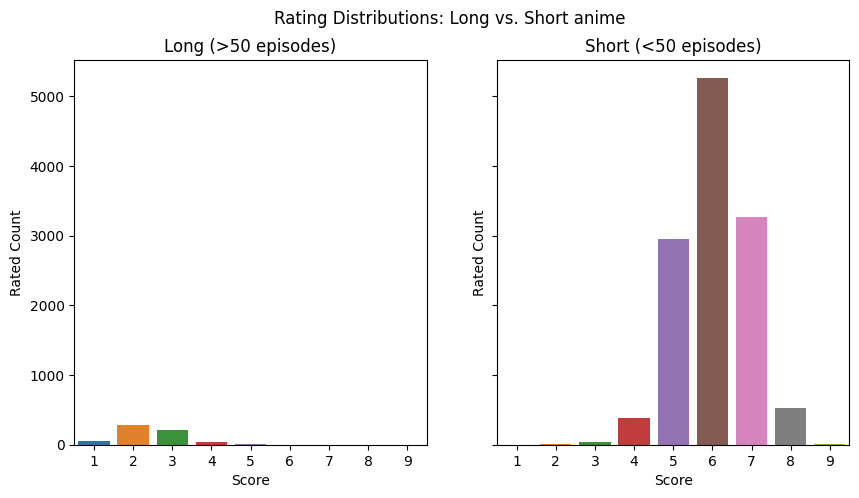

In [8]:
# Visualizing the distribution of ratings comparing long to short anime - An anime is considered long within the dataset if it has
# more than 100 episodes. 
filtered_data_2 = data[['score', 'episodes']].dropna()
filtered_data_2['score'] = filtered_data_2['score'].astype(int)
long_anime = filtered_data_2[filtered_data_2['episodes'] >= 50]
short_anime = filtered_data_2[filtered_data_2['episodes'] < 50]

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Rating Distributions: Long vs. Short anime')

sns.countplot(ax=axes[0], x='score', data = long_anime)
axes[0].set_title('Long (>50 episodes)')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Rated Count')


sns.countplot(ax=axes[1], x='score', data = short_anime)
axes[1].set_title('Short (<50 episodes)')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Rated Count')

plt.show()

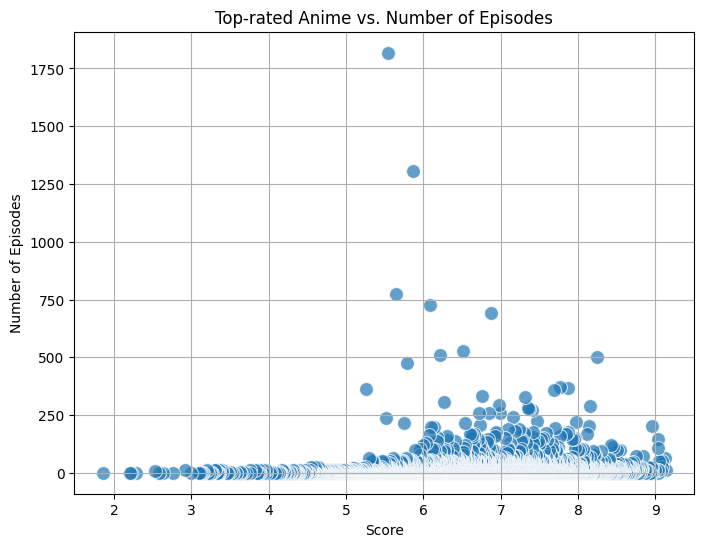

In [9]:
# Visualziing the top-rated anime in comparsion to the number of episdoes the show has. 
filtered_df_2 = data[['title', 'start_year', 'score', 'episodes']]
filtered_df_2 = filtered_df_2[pd.to_numeric(filtered_df_2['episodes'], errors='coerce').notnull()]
filtered_df_2['episodes'] = pd.to_numeric(filtered_df_2['episodes'])

# Sort the DataFrame by score in descending order
filtered_df_2 = filtered_df_2.sort_values('score', ascending=False)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df_2, x='score', y='episodes', s=100, alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Number of Episodes')
plt.title('Top-rated Anime vs. Number of Episodes')
plt.grid(True)
plt.show()
# color them by category, try to get rid of outliers, above 500 
# combination of the two 

Text(0, 0.5, 'Number of Members')

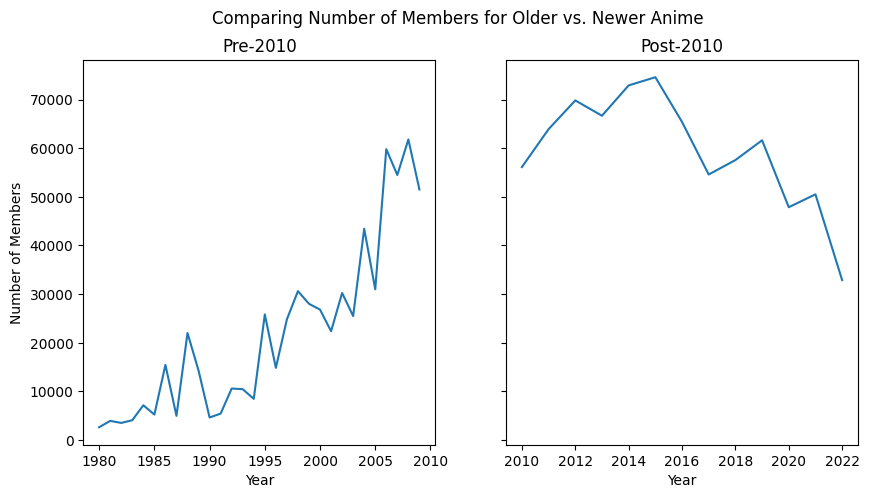

In [10]:
#Analyzing by Genre for pre-2016 and post-2016 showing the amount of members per year
filtered_data_3 = data[['start_year', 'members']]

pre_2010 = filtered_data_3[filtered_data_3['start_year'] < 2010]
post_2010 = filtered_data_3[(filtered_data_3['start_year'] >= 2010) & (filtered_data_3['start_year'] < 2023)]

data_by_year_pre_2010 = pre_2010.groupby('start_year')['members'].mean().reset_index(name='avg_members')
data_by_year_post_2010 = post_2010.groupby('start_year')['members'].mean().reset_index(name='avg_members')


fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Comparing Number of Members for Older vs. Newer Anime')

sns.lineplot(ax=axes[0], data=data_by_year_pre_2010, x='start_year', y='avg_members')
axes[0].set_title('Pre-2010')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Members')

sns.lineplot(ax=axes[1], data=data_by_year_post_2010, x='start_year', y='avg_members')
axes[1].set_title('Post-2010')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Members')

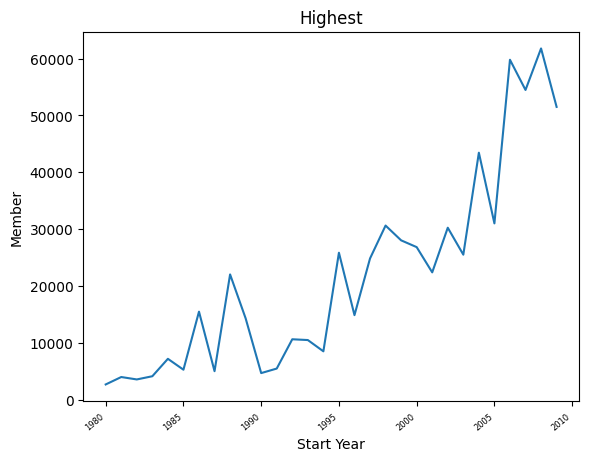

In [11]:
# Visualizing the amount of members per year pre 2010
sns.lineplot(data=data_by_year_pre_2010, x='start_year', y='avg_members')
plt.xlabel('Start Year')
plt.ylabel('Member')
plt.title('Highest')
plt.xticks(rotation=40, ha="right", fontsize=6)
plt.savefig('line_plot_.png', bbox_inches='tight')
plt.show()

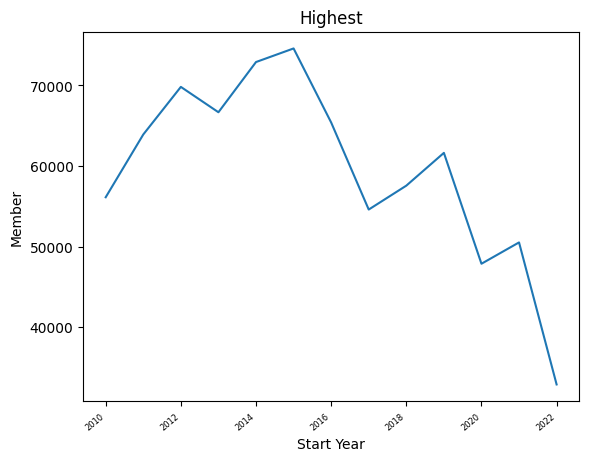

In [12]:
# Visualizing the amount of members per year post 20160
sns.lineplot(data=data_by_year_post_2010, x='start_year', y='avg_members')
plt.xlabel('Start Year')
plt.ylabel('Member')
plt.title('Highest')
plt.xticks(rotation=40, ha="right", fontsize=6)
plt.savefig('line_plot_.png', bbox_inches='tight')
plt.show()

In [13]:
def clean(x):
    x = x.strip('\'][\'').split('\', \'')
    return x

In [21]:
filtered_data_4 = data[['title', 'genres', 'members', 'start_year', 'score']].dropna()
filtered_data_4.loc[:, 'genres'] = filtered_data_4.loc[:, 'genres'].apply(clean)
data_from_70 = filtered_data_4[(filtered_data_4['start_year'] >= 1970) & (filtered_data_4['start_year'] < 1980)]
data_from_80 = filtered_data_4[(filtered_data_4['start_year'] >= 1980) & (filtered_data_4['start_year'] < 1990)]
data_from_90 = filtered_data_4[(filtered_data_4['start_year'] >= 1990) & (filtered_data_4['start_year'] < 2000)]
data_from_00 = filtered_data_4[(filtered_data_4['start_year'] >= 2000) & (filtered_data_4['start_year'] < 2010)]
data_from_10 = filtered_data_4[(filtered_data_4['start_year'] >= 2010) & (filtered_data_4['start_year'] < 2020)]

In [15]:
genre_dict = {}

# Explode the 'genres' column to transform list elements into separate rows
exploded_data = filtered_data_4.explode('genres')

# Group the data by genre and aggregate the titles into a list
genre_group = exploded_data.groupby('genres')['members'].apply(sum)

# Convert the groupby object to a dictionary
genre_dict = genre_group.to_dict()

genre_dict.pop('')

genre_dict

{'Action': 364388492,
 'Adventure': 170466691,
 'Avant Garde': 8145316,
 'Award Winning': 1724420,
 'Boys Love': 6177837,
 'Comedy': 301531198,
 'Drama': 213862465,
 'Ecchi': 80708344,
 'Erotica': 775572,
 'Fantasy': 252889747,
 'Girls Love': 6249226,
 'Gourmet': 8681024,
 'Hentai': 9772034,
 'Horror': 39514675,
 'Mystery': 80891655,
 'Romance': 206240638,
 'Sci-Fi': 129073412,
 'Slice of Life': 77922212,
 'Sports': 27659452,
 'Supernatural': 176598887,
 'Suspense': 37887081}

In [26]:
genre_dict_2 = {}

# Explode the 'genres' column to transform list elements into separate rows
exploded_data_2 = filtered_data_4.explode('genres')

# Group the data by genre and aggregate the titles into a list
genre_group_2 = exploded_data_2.groupby('genres')['score'].mean()

# Convert the groupby object to a dictionary
genre_dict_2 = genre_group_2.to_dict()

genre_dict_2.pop('')

genre_dict_2

{'Action': 6.7578125,
 'Adventure': 6.7750349650349655,
 'Avant Garde': 5.694301075268818,
 'Award Winning': 7.89,
 'Boys Love': 6.532411347517731,
 'Comedy': 6.659016823246668,
 'Drama': 6.9657386079118675,
 'Ecchi': 6.475242587601079,
 'Erotica': 6.379333333333333,
 'Fantasy': 6.691500910746812,
 'Girls Love': 6.6627368421052635,
 'Gourmet': 6.720574712643679,
 'Hentai': 6.107667844522968,
 'Horror': 6.2573067331670815,
 'Mystery': 7.059418960244648,
 'Romance': 6.85900624645088,
 'Sci-Fi': 6.632344322344323,
 'Slice of Life': 6.745229289940828,
 'Sports': 6.82893528183716,
 'Supernatural': 6.886892911010558,
 'Suspense': 7.044178082191781}

In [44]:
genre_dict_3 = {}

# Explode the 'genres' column to transform list elements into separate rows
exploded_data_3 = filtered_data_4.explode('genres')

# Group the data by genre and aggregate the titles into a list
genre_group_3 = exploded_data_3.groupby('genres')['title'].apply(list)

# Convert the groupby object to a dictionary
genre_dict_3 = genre_group_3.to_dict()

genre_dict_3.pop('')

genre_dict_3['Hentai']

['Mankitsu Happening',
 'Eroge! H mo Game mo Kaihatsu Zanmai',
 'Itadaki! Seieki♥',
 'Kanojo x Kanojo x Kanojo: Sanshimai to no DokiDoki Kyoudou Seikatsu',
 'Rance 01: Hikari wo Motomete The Animation',
 'Master Piece The Animation',
 'Overflow',
 'Ane wa Yanmama Junyuu-chuu',
 'Baku Ane: Otouto Shibocchau zo! The Animation',
 'Youkoso! Sukebe Elf no Mori e',
 'Imaizumin Chi wa Douyara Gal no Tamariba ni Natteru Rashii',
 'Kuroinu: Kedakaki Seijo wa Hakudaku ni Somaru',
 'Sono Hanabira ni Kuchizuke wo: Anata to Koibito Tsunagi',
 'Uchi no Otouto Maji de Dekain Dakedo Mi ni Konai?',
 'Fella Pure: Mitarashi-san Chi no Jijou The Animation',
 'Toshi Densetsu Series',
 'Oni Chichi: Re-born',
 'Isekai Harem Monogatari',
 'Maki-chan to Now.',
 'HHH Triple Ecchi',
 'Kyonyuu Fantasy',
 'Swing Out Sisters (2014)',
 'Resort Boin',
 'Tsugou no Yoi Sexfriend?',
 'Hatsu Inu The Animation',
 'Koiito Kinenbi The Animation',
 'Itadaki! Seieki♥ Special',
 'JK Bitch ni Shiboraretai',
 'Ijirare: Fukushuu 

In [49]:
genre_df = pd.DataFrame(genre_dict.items(), columns=['genres', 'members'])

In [50]:
genre_df.insert(2, 'score', genre_dict_2.values(), True)
genre_df.insert(3, 'titles', genre_dict_3.values(), True)

In [51]:
genre_df.score = genre_df.score.round(2)

In [52]:
genre_df

,genres,members,score,titles
0,Action,364388492,6.76,"[Fullmetal Alchemist: Brotherhood, Hunter x Hu..."
1,Adventure,170466691,6.78,"[Fullmetal Alchemist: Brotherhood, Hunter x Hu..."
2,Avant Garde,8145316,5.69,[Neon Genesis Evangelion: The End of Evangelio...
3,Award Winning,1724420,7.89,"[Sen to Chihiro no Kamikakushi, Tsumiki no Ie,..."
4,Boys Love,6177837,6.53,"[Given, Doukyuusei (Movie), Given Movie, Sekai..."
5,Comedy,301531198,6.66,"[Mob Psycho 100 II, One Punch Man, Tengen Topp..."
6,Drama,213862465,6.97,"[Fullmetal Alchemist: Brotherhood, Shingeki no..."
7,Ecchi,80708344,6.48,[Mushoku Tensei: Isekai Ittara Honki Dasu Part...
8,Erotica,775572,6.38,[Saezuru Tori wa Habatakanai: The Clouds Gathe...
9,Fantasy,252889747,6.69,"[Fullmetal Alchemist: Brotherhood, Hunter x Hu..."
